In [31]:
import numpy as np
import matplotlib.pyplot as plt


subjects=list(range(25,36)) 
bands=[-1,0,1,2] 
sessions=list(range(1,3))
spaces=['electrodeSpace']#,'fontSpace']
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
fmt_grph = 'png'
cmapcolours = ['blue','green','orange','red']
names=[]
for band in band_dic.values():
    names.append(band+'1')
    names.append(band+'2')

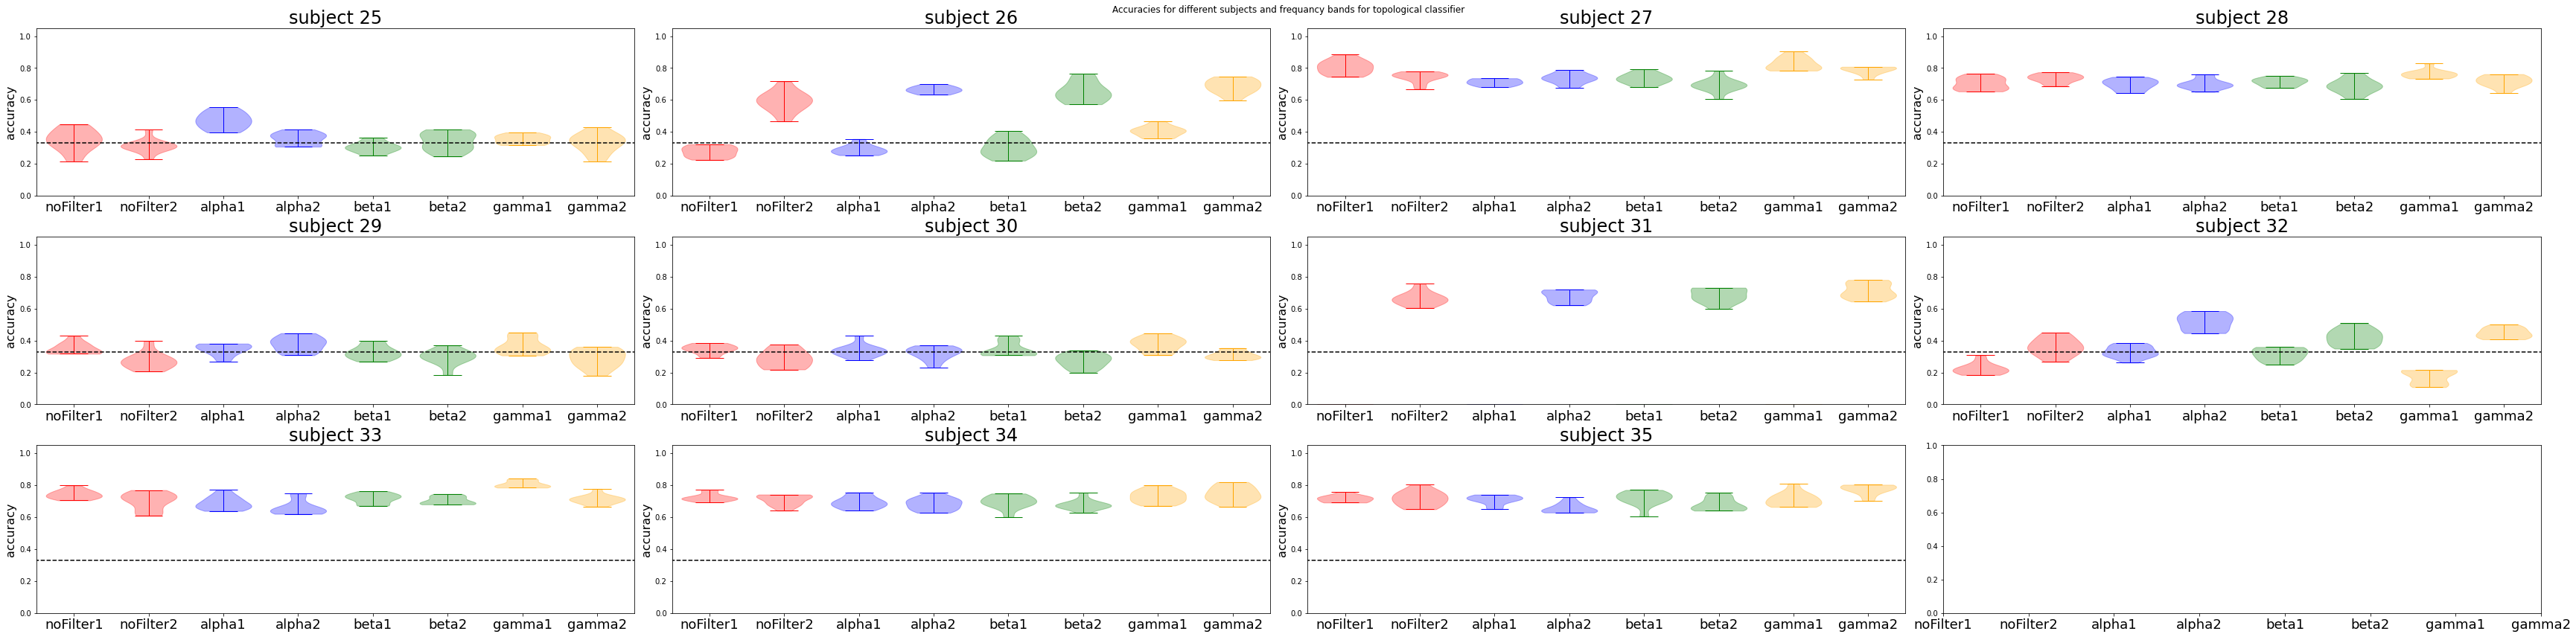

In [46]:
for space in spaces:
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(48, 12))
    plt.rcParams['xtick.labelsize']=18
    subj=25
    for i in range(3):
        for j in range(4):
            if j==3 and i==2:
                break
            perf=np.zeros((4,2,10))
            k=0
            for b in bands:
                band=band_dic[b]
                temp1=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
                temp2=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(2)+'/topological_clf/'+band+'perf_intensity.npy')[0,1]
                if temp1.sum()==0:
                    temp=temp2
                elif temp2.sum==0:
                    temp=temp1
                else:
                    temp=np.concatenate((temp1,temp2),axis=0)
                violin1=axes[i][j].violinplot(temp1,positions=[-0.6+k*0.8],widths=[0.3])
                violin2=axes[i][j].violinplot(temp2,positions=[-0.2+k*0.8],widths=[0.3])
                
                for partname in ('cbars','cmins','cmaxes'):
                    vp = violin1[partname]
                    vp.set_edgecolor(cmapcolours[b])
                    vp.set_linewidth(1)
                    vp = violin2[partname]
                    vp.set_edgecolor(cmapcolours[b])
                    vp.set_linewidth(1)
                
                for pc in violin1['bodies']:
                    pc.set_facecolor(cmapcolours[b])
                    pc.set_edgecolor(cmapcolours[b])

                for pc in violin2['bodies']:
                    pc.set_facecolor(cmapcolours[b])
                    pc.set_edgecolor(cmapcolours[b])

                    
                k=k+1
            
    
            axes[i][j].plot([-1,2.5],[0.33]*2,'--k')
            axes[i][j].axis(xmin=-0.8,xmax=2.4,ymin=0,ymax=1.05)
            axes[i][j].set_ylabel('accuracy',fontsize=16)
            axes[i][j].set_title('subject '+str(subj),fontsize=24)
            subj=subj+1

            plt.setp(axes,xticks=[-0.6,-0.2,0.2, 0.6,1,1.4,1.8,2.2],xticklabels=names)
    
    fig.suptitle('Accuracies for different subjects and frequancy bands for topological classifier')
    fig.subplots_adjust(top=0.75)
    fig.tight_layout(pad=0.5)